In [1]:
# 필요 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/교량_통합데이터1.csv'
df = pd.read_csv(csvFile)
df.head()

,교량명,시설물종별등급구분,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,진위교,2,125.0,21.0,4,PSCI거더교,B,DB-24,37,5.0,25.0,21443.0
1,풍계교,3,55.0,20.0,2,RC슬래브교,B,DB-24,27,4.0,15.0,5654.0
2,태평교,3,43.8,19.5,4,PSCI거더교,B,DB-24,32,2.0,21.9,8750.0
3,장평교,2,105.0,19.5,4,RC슬래브교,B,DB-24,30,7.0,15.0,14150.0
4,덕평교,3,32.0,10.0,2,RC슬래브교,B,DB-24,27,2.0,16.0,3739.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        4401 non-null   object 
 1   시설물종별등급구분  4401 non-null   object 
 2   교량연장       4401 non-null   float64
 3   교량폭        4401 non-null   float64
 4   차로수        4401 non-null   int64  
 5   상부구조형식     4401 non-null   object 
 6   최종안전점검결과   4401 non-null   object 
 7   설계활하중      4401 non-null   object 
 8   준공후경과년수    4401 non-null   int64  
 9   경간수        4401 non-null   float64
 10  최대경간장      4401 non-null   float64
 11  교통량        4401 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 412.7+ KB


In [4]:
# 준공 후 경과년수에 따른 교통량 합계

def category_year(myYear):
    if myYear < 5:
        return '5년 미만'
    elif myYear < 10:
        return '5년 이상 10년 미만'
    elif myYear < 15:
        return '10년 이상 15년 미만'
    elif myYear < 20:
        return '15년 이상 20년 미만'
    elif myYear < 25:
        return '20년 이상 25년 미만'
    else:
        return '25년 이상'

In [5]:
df['Cum_year'] = df['준공후경과년수'].apply(lambda x: category_year(x))

In [6]:
# 준공 후 경과년수별 교통량평균 확인
mean_Cumyear = df[['Cum_year', '교통량']].groupby(['Cum_year'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_Cumyear

,Cum_year,교통량
0,25년 이상,43338.650485
1,20년 이상 25년 미만,43260.291215
2,10년 이상 15년 미만,35159.774627
3,15년 이상 20년 미만,31959.495446
4,5년 미만,30469.425743
5,5년 이상 10년 미만,25586.913366


C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\3873668749.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


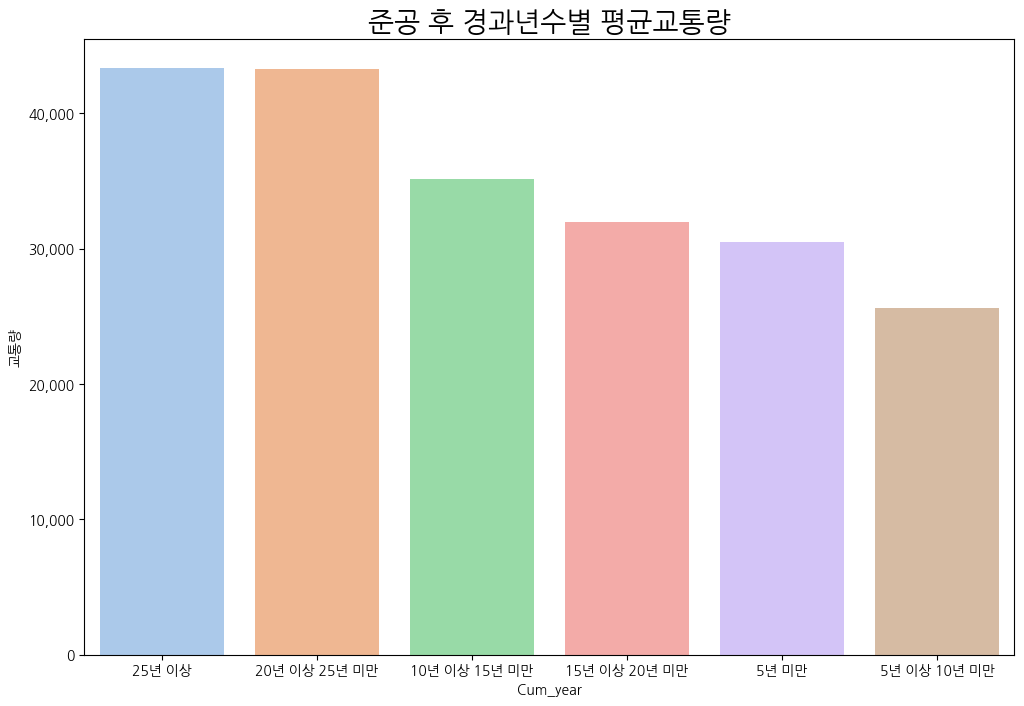

In [7]:
# 준공 후 경과년수별 교통량평균 그래프 확인
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Cum_year', y = '교통량', palette = 'pastel', data = mean_Cumyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('준공 후 경과년수별 평균교통량', fontsize = 20)
plt.show()

In [8]:
# 상부구조별 교통량합계 확인(범주화를 하지 않음)
mean_structure = df[['상부구조형식', '교통량']].groupby(['상부구조형식'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,상부구조형식,교통량
0,RC중공슬래브교,62012.012658
1,프리플렉스거더교,52295.825342
2,강플레이트거더교,51047.840000
3,PSC박스거더교,43900.913978
4,강박스거더교,42193.570265
5,엑스트라도즈드교,40389.000000
6,라멘교,38112.530997
7,아치교,37905.318182
8,PSCI거더교,33739.923077
9,RC박스거더교,33675.500000


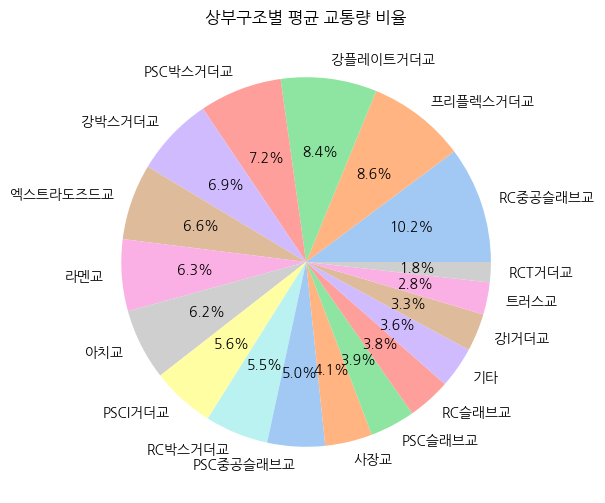

In [9]:
# 상부구조별 평균교통량 비율 파이그래프 확인
plt.figure(figsize = (8, 6))
colors = sns.color_palette('pastel')
plt.pie(mean_structure['교통량'], colors = colors, labels = mean_structure['상부구조형식'], autopct='%1.1f%%')
plt.title('상부구조별 평균 교통량 비율')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\3639857547.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


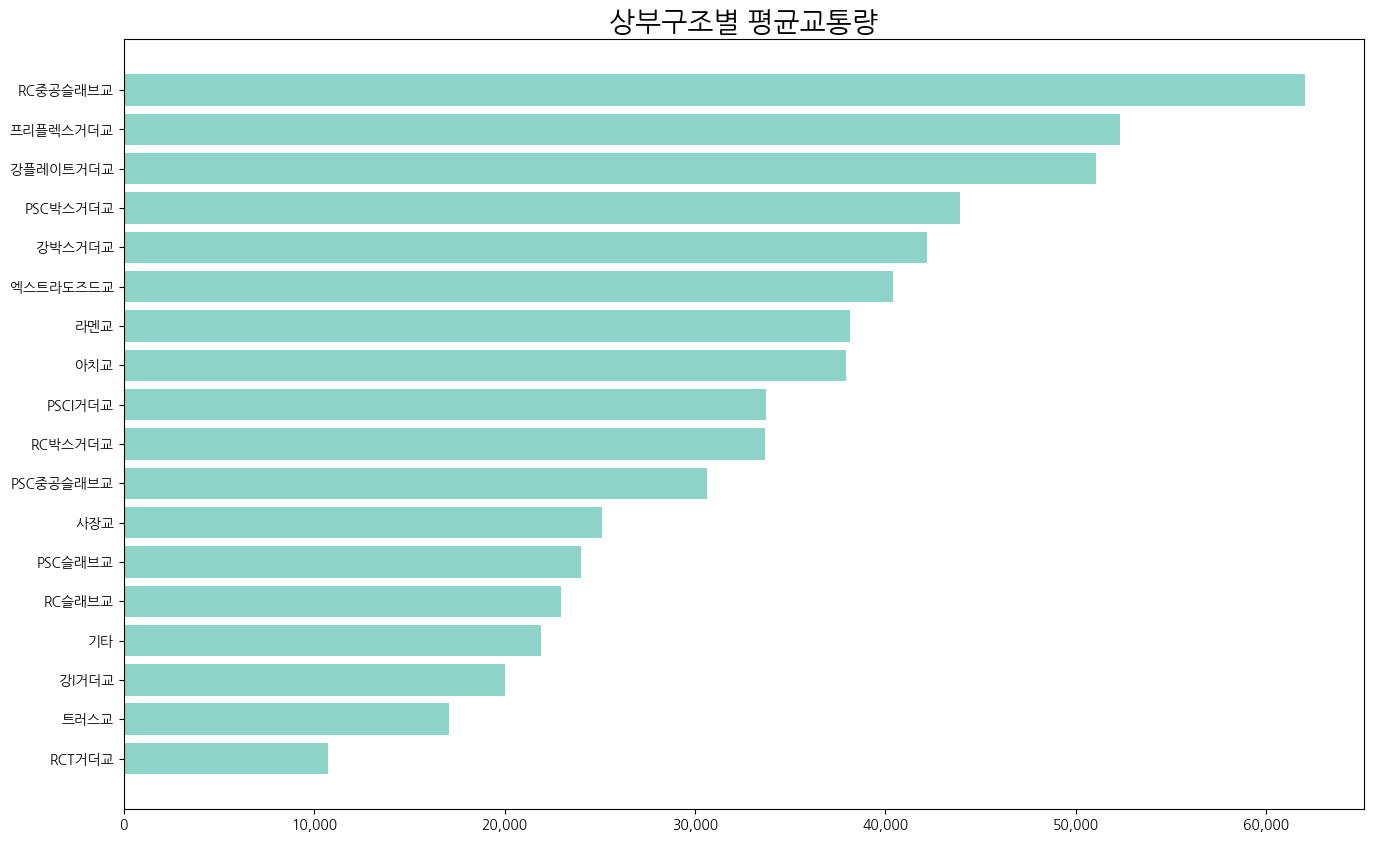

In [10]:
# 상부구조별 교통량평균 그래프 확인
sns.set_palette("Set3")
plt.figure(figsize = (16, 10))
mean_st = mean_structure.sort_values(by = '교통량', ascending = True)
plt.barh(mean_st['상부구조형식'], mean_st['교통량'])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 평균교통량', fontsize = 20)

plt.show()

In [11]:
# 안전등급에 따른 평균교통량
mean_grade = df[['최종안전점검결과', '교통량']].groupby(['최종안전점검결과'], as_index = False).mean()
mean_grade

,최종안전점검결과,교통량
0,A,33052.511545
1,B,38374.454262
2,C,25779.092937
3,E,59335.473684


C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\2657306575.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


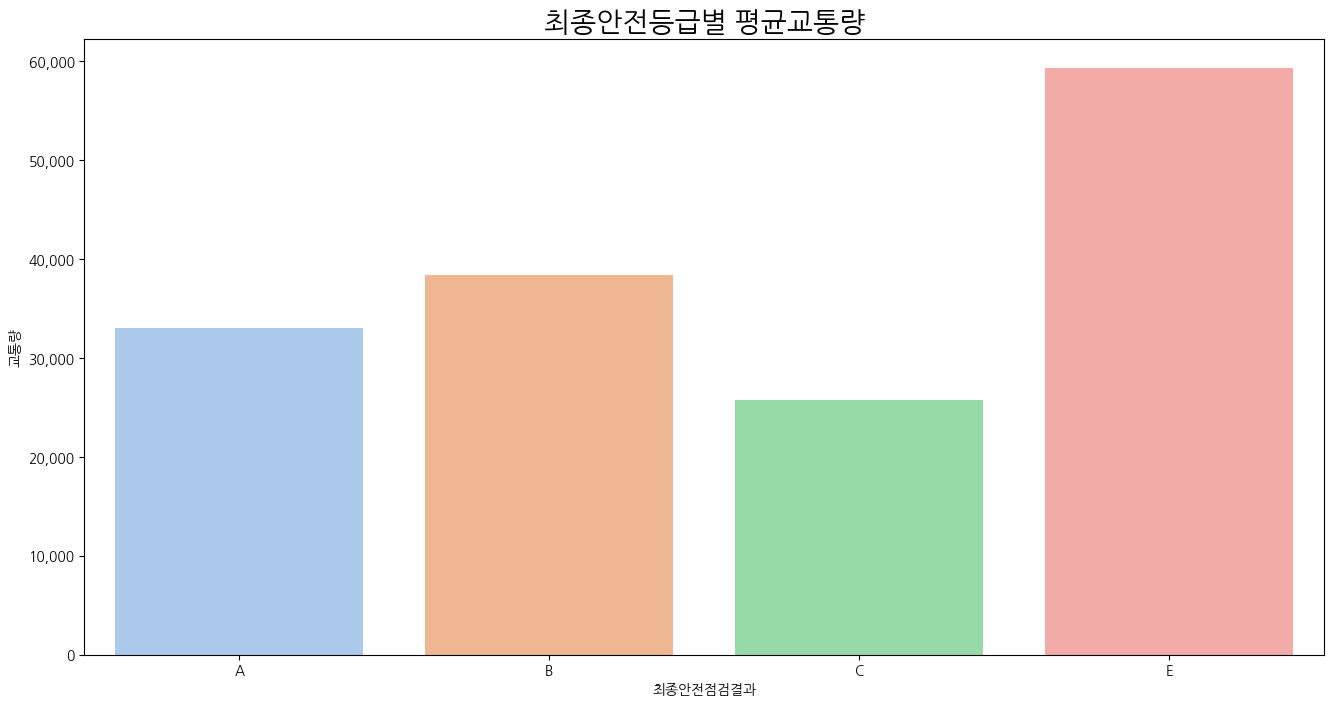

In [12]:
# 시설물등급에 따른 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '최종안전점검결과', y = '교통량', palette = 'pastel', data = mean_grade)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전등급별 평균교통량', fontsize = 20)
plt.show()

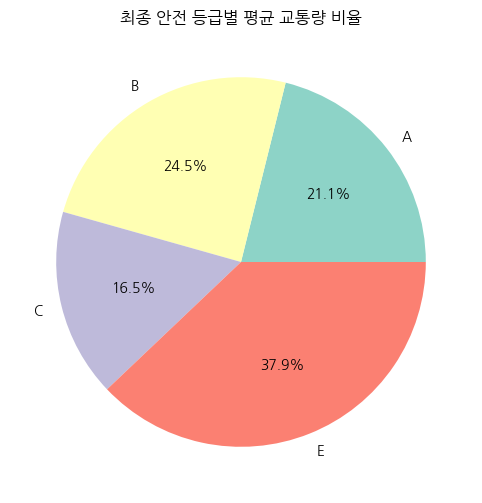

In [13]:
# 시설물등급에 따른 교통량평균 파이그래프
plt.figure(figsize = (8, 6))
plt.pie(mean_grade['교통량'], labels = mean_grade['최종안전점검결과'], autopct='%1.1f%%')
plt.title('최종 안전 등급별 평균 교통량 비율')
plt.show()

In [14]:
# 새로운 시설물 등급컬럼 생성
# 1, 2, 3종 이외는 기타로 통합
def new_facility(facility):
    if facility == '1':
        return '1종 시설물'
    elif facility == '2':
        return '2종 시설물'
    elif facility == '3':
        return '3종 시설물'
    else:
        return '기타'

In [15]:
df['New_facility'] = df['시설물종별등급구분'].apply(lambda x: new_facility(x))

In [16]:
# 시설물등급에 따른 교통량평균
mean_facility = df[['New_facility', '교통량']].groupby(['New_facility'], as_index = False).mean()
mean_facility

,New_facility,교통량
0,1종 시설물,42953.613169
1,2종 시설물,32955.085246
2,3종 시설물,39884.322681
3,기타,34368.665536


C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\1605370791.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


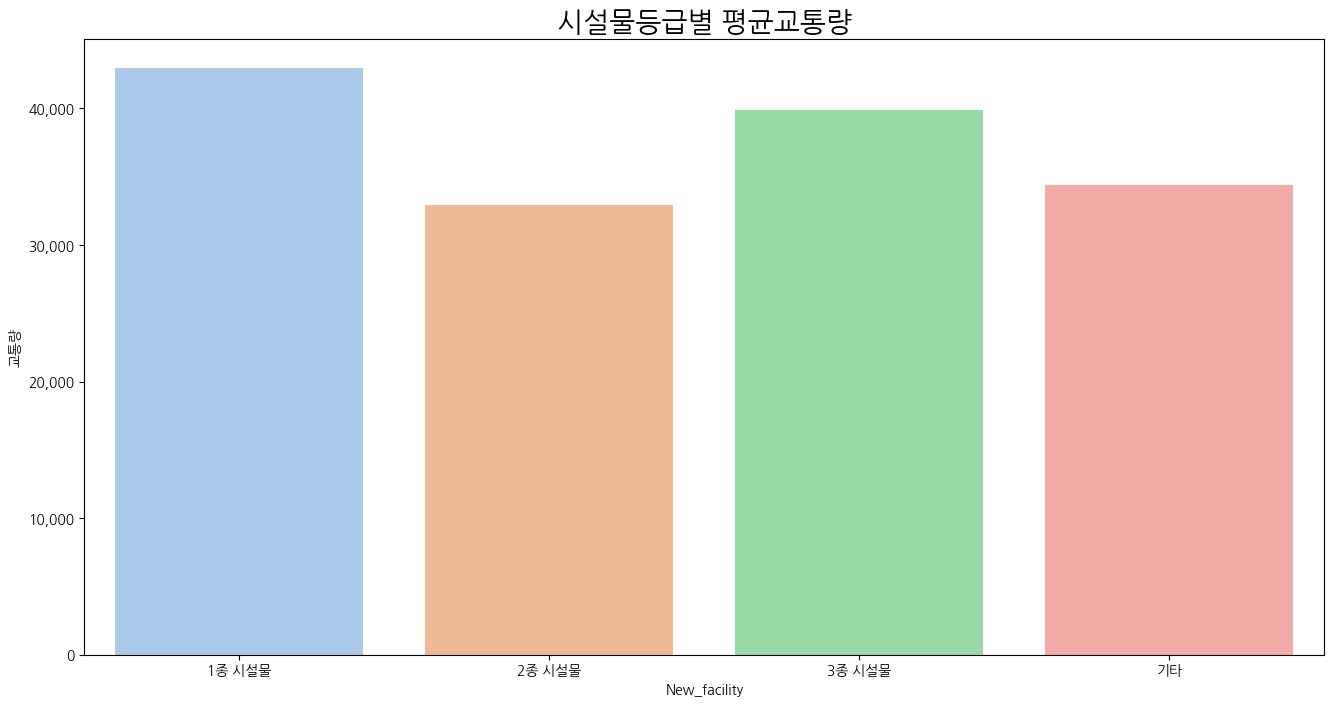

In [17]:
# 시설물등급에 따른 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_facility', y = '교통량', palette = 'pastel', data = mean_facility)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별 평균교통량', fontsize = 20)
plt.show()

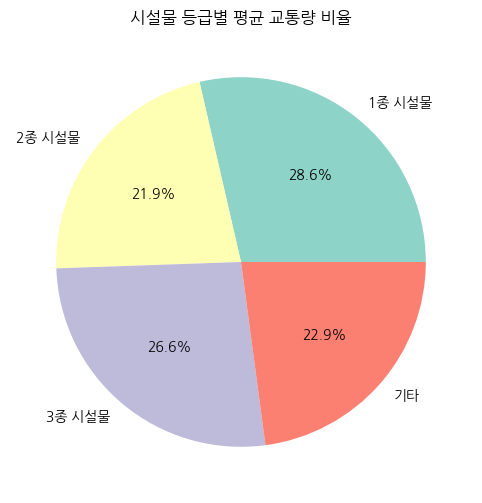

In [18]:
# 시설물등급에 따른 교통량평균 파이그래프 확인
plt.figure(figsize = (8, 6))
plt.pie(mean_facility['교통량'], labels = mean_facility['New_facility'], autopct='%1.1f%%')
plt.title('시설물 등급별 평균 교통량 비율')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\1468722805.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


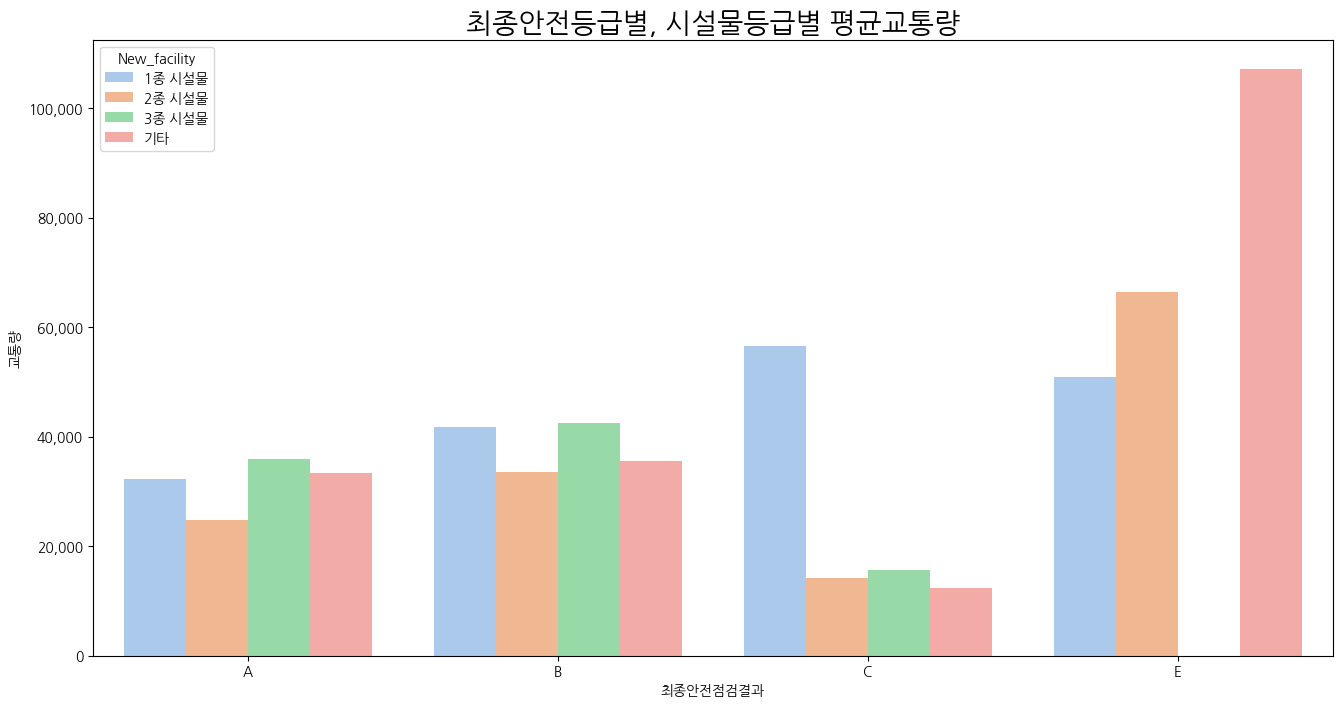

In [19]:
# 최종안전등급별, 시설물등급별 평균교통량 확인

plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'New_facility', palette = 'pastel', data = df, order = group_name,
            errorbar = None, hue_order = ['1종 시설물', '2종 시설물', '3종 시설물', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전등급별, 시설물등급별 평균교통량', fontsize = 20)
plt.show()

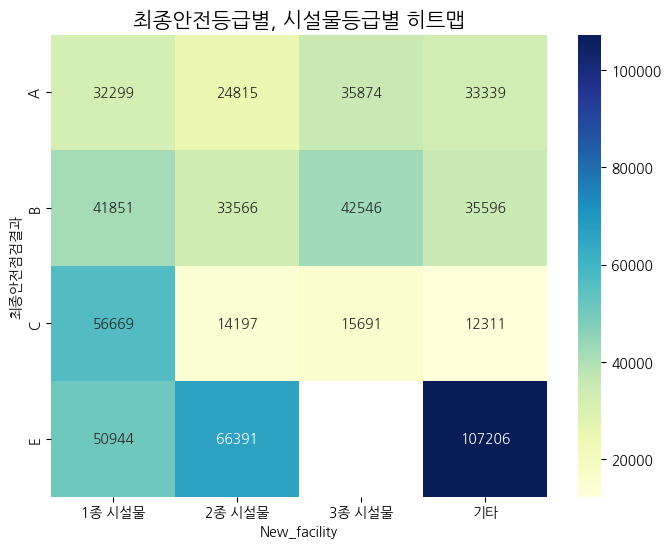

In [20]:
# 최종안전등급별, 시설물등급별, 평균교통량 히트맵 그리기
pivot = df.pivot_table(index = '최종안전점검결과', columns = 'New_facility', values = '교통량')

plt.figure(figsize = (8, 6))
sns.heatmap(pivot, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('최종안전등급별, 시설물등급별 히트맵', fontsize = 15)
plt.xlabel('New_facility')
plt.ylabel('최종안전점검결과')
plt.show()

D:\Anaconda\envs\pythonEx\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


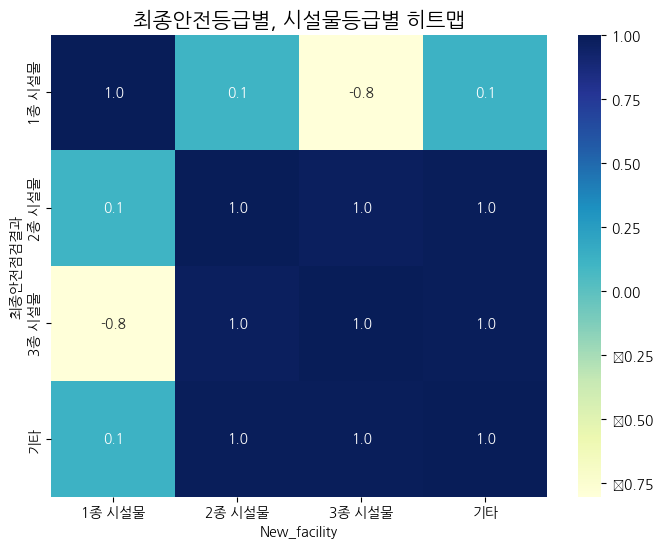

In [21]:
# 최종안전등급별, 시설물등급별, 평균교통량 상관계수 히트맵
pivot = df.pivot_table(index = '최종안전점검결과', columns = 'New_facility', values = '교통량')
corr_matrix = pivot.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix , annot = True, fmt = '.1f', cmap = 'YlGnBu')
plt.title('최종안전등급별, 시설물등급별 히트맵', fontsize = 15)
plt.xlabel('New_facility')
plt.ylabel('최종안전점검결과')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\938384921.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


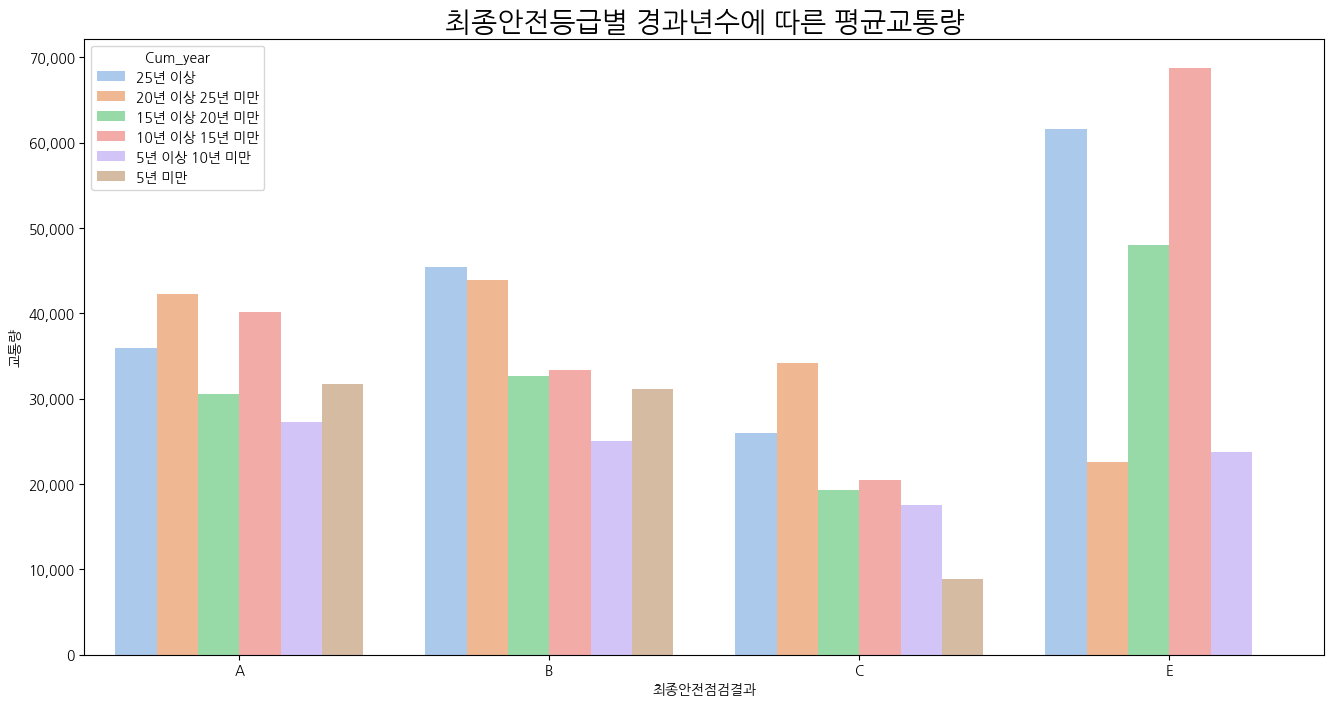

In [22]:
# 안전등급, 경과년수별에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['25년 이상', '20년 이상 25년 미만', '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전등급별 경과년수에 따른 평균교통량', fontsize = 20)
plt.show()

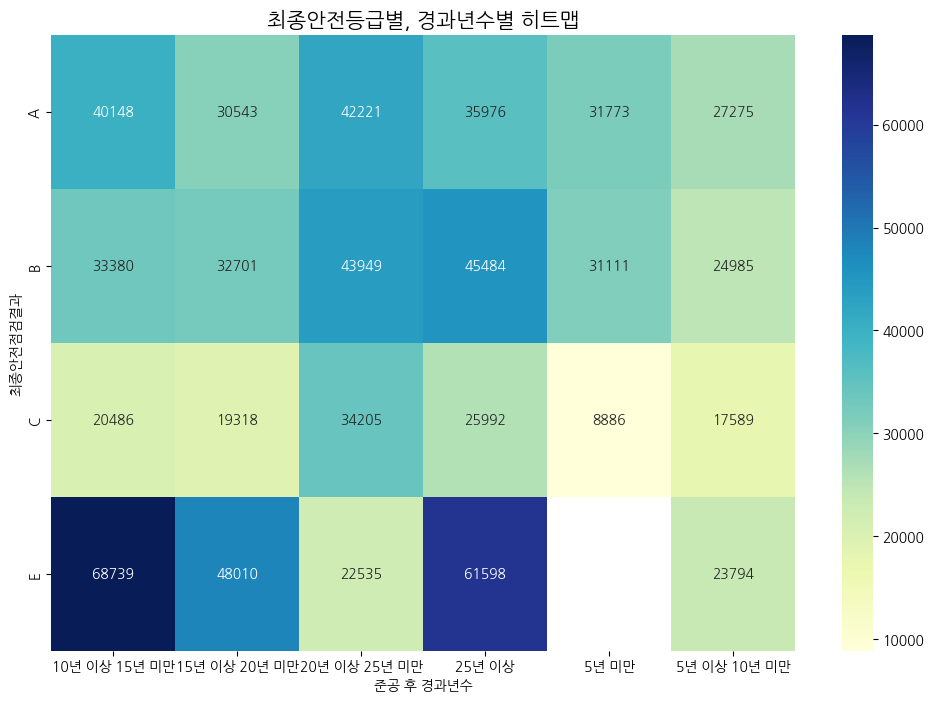

In [23]:
# 최종안전등급별, 경과년수, 평균교통량 히트맵 그리기
pivot = df.pivot_table(index = '최종안전점검결과', columns = 'Cum_year', values = '교통량')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('최종안전등급별, 경과년수별 히트맵', fontsize = 15)
plt.xlabel('준공 후 경과년수')
plt.ylabel('최종안전점검결과')
plt.xticks(rotation = 0)
plt.show()

D:\Anaconda\envs\pythonEx\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


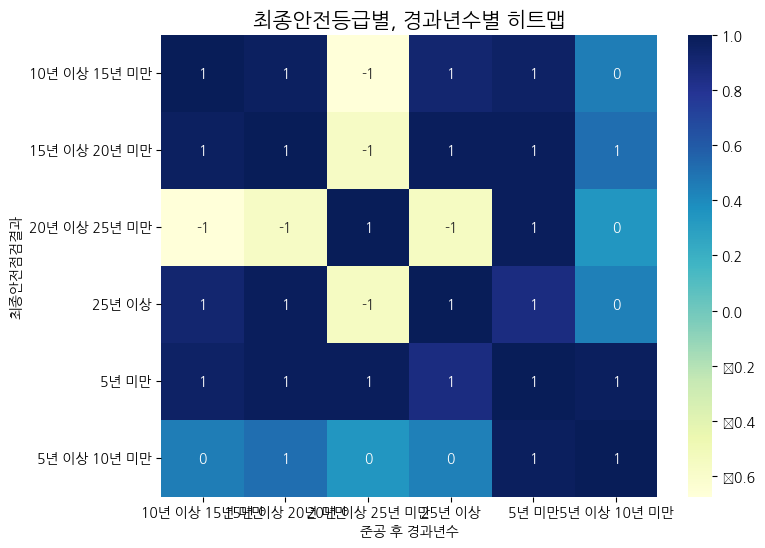

In [24]:
# 최종안전등급별, 경과년수, 평균교통량 상관계수 히트맵
pivot = df.pivot_table(index = '최종안전점검결과', columns = 'Cum_year', values = '교통량')
corr_matrix = pivot.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('최종안전등급별, 경과년수별 히트맵', fontsize = 15)
plt.xlabel('준공 후 경과년수')
plt.ylabel('최종안전점검결과')
plt.xticks(rotation = 0)
plt.show()

In [25]:
# 설계하중별, 안전등급별 평균교통량
# 설계하중별 교통량
def category_weight(weight):
    if weight == 'DB-24':
        return '1등교'
    elif weight == 'DB-18':
        return '2등교'
    elif weight == 'DB-13.5':
        return '3등교'
    else:
        return '기타'

In [26]:
df['New_Weight'] = df['설계활하중'].apply(lambda x: category_weight(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\3908436725.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


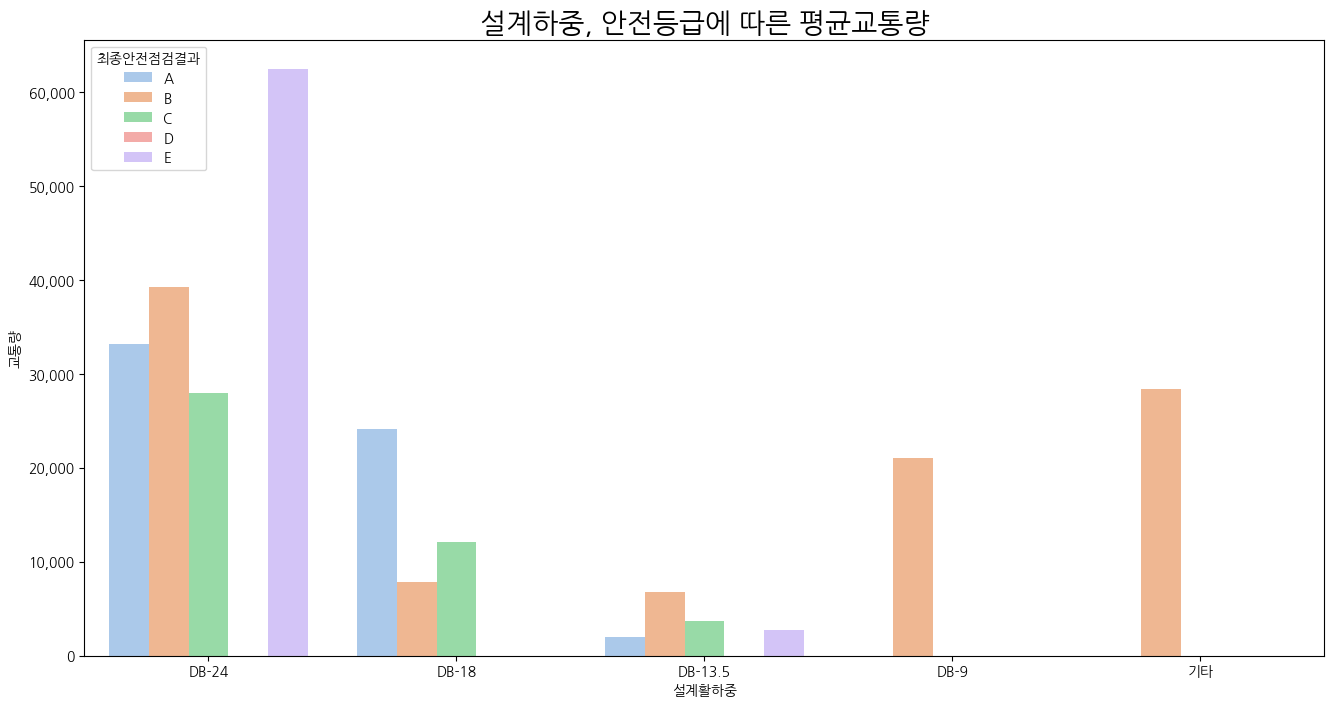

In [27]:
# 설계하중, 안전등급에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타']
sns.barplot(x = '설계활하중', y = '교통량', hue = '최종안전점검결과', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['A', 'B', 'C', 'D', 'E'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중, 안전등급에 따른 평균교통량', fontsize = 20)
plt.show()

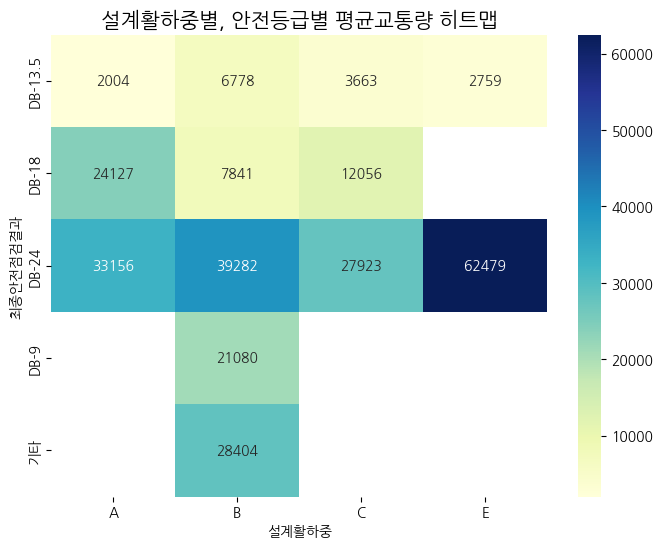

In [28]:
# 설계하중, 안전등급에 따른 평균교통량 히트맵 그리기
pivot_table = df.pivot_table(index='설계활하중', columns='최종안전점검결과', values='교통량')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('설계활하중별, 안전등급별 평균교통량 히트맵', fontsize = 15)
plt.xlabel('설계활하중')
plt.ylabel('최종안전점검결과')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\880605494.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


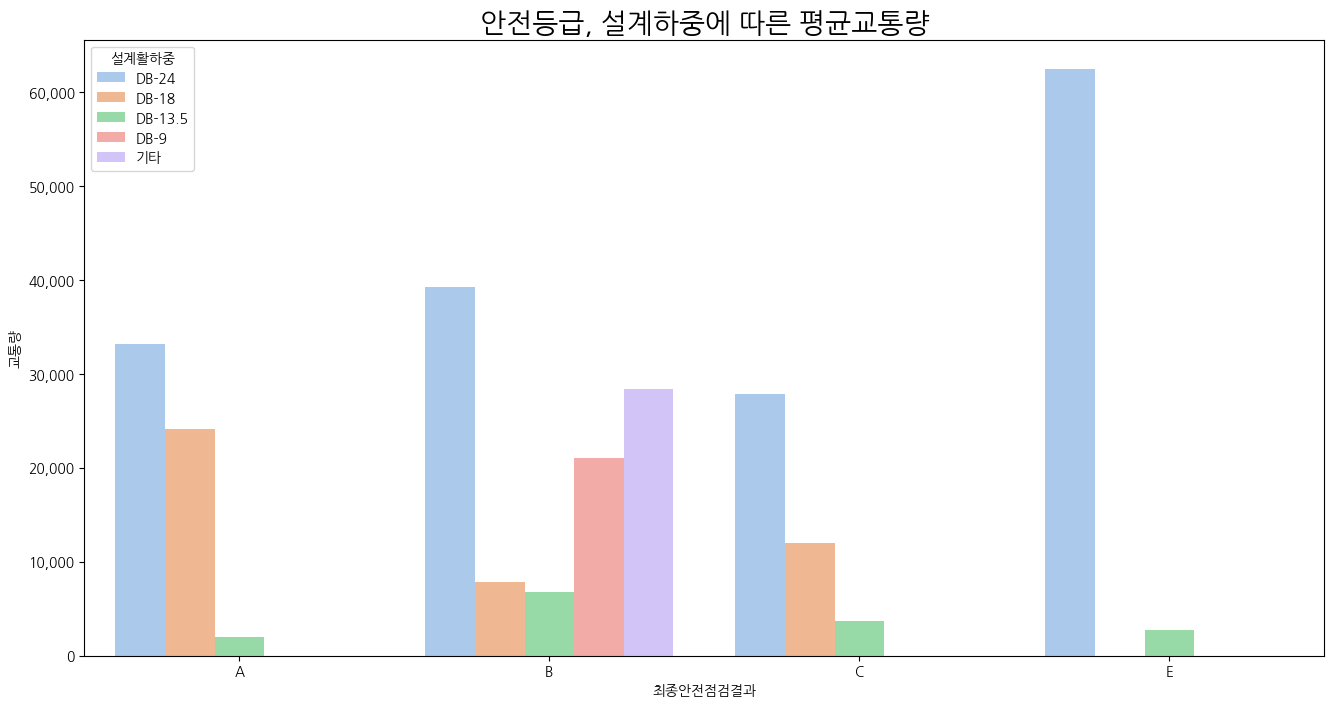

In [29]:
# 안전등급, 설계하중에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = '설계활하중', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('안전등급, 설계하중에 따른 평균교통량', fontsize = 20)
plt.show()

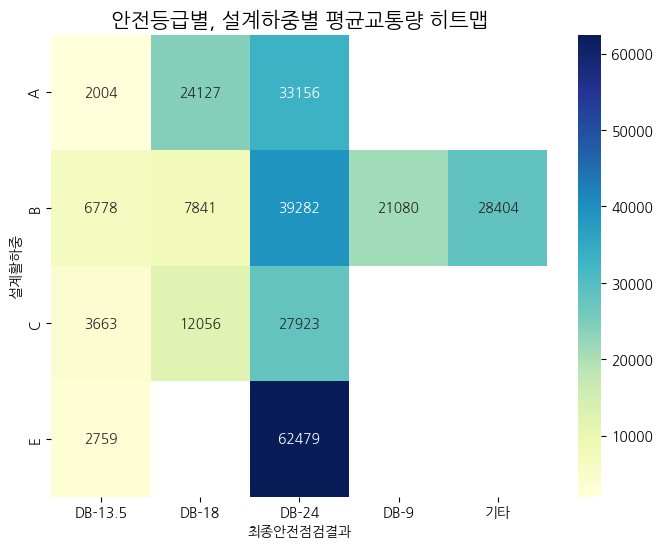

In [30]:
# 최종안전등급별, 설계하중별, 평균교통량 히트맵 그리기
pivot_table = df.pivot_table(index = '최종안전점검결과', columns = '설계활하중', values='교통량')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('안전등급별, 설계하중별 평균교통량 히트맵', fontsize = 15)
plt.xlabel('최종안전점검결과')
plt.ylabel('설계활하중')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\362100778.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


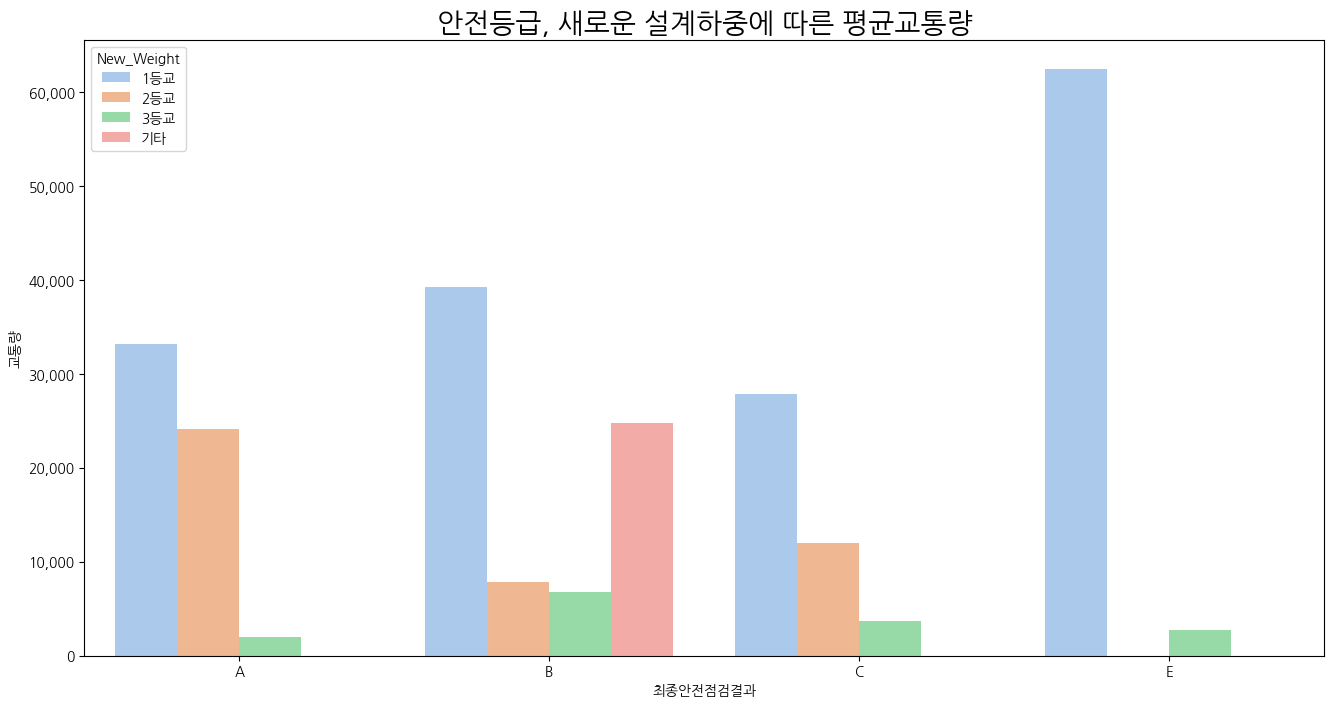

In [31]:
# 안전등급, 설계하중에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'New_Weight', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['1등교', '2등교', '3등교', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('안전등급, 새로운 설계하중에 따른 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\3153730889.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


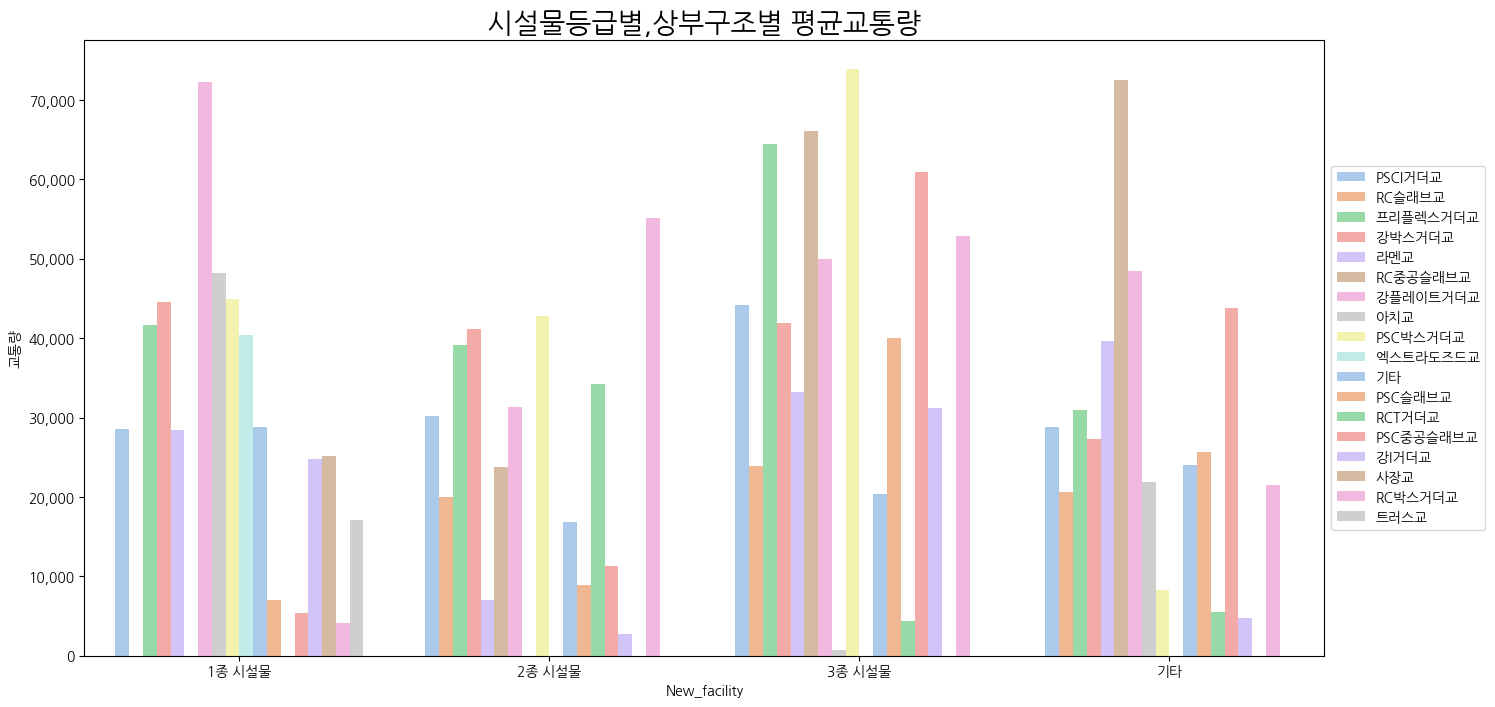

In [32]:
# 상부구조, 시설물등급별 평균교통량 확인
plt.figure(figsize = (16, 8))
group_name = ['1종 시설물', '2종 시설물', '3종 시설물', '기타']
sns.barplot(x = 'New_facility', y = '교통량', hue = '상부구조형식', palette = 'pastel', data = df, order = group_name,
            errorbar = None)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별,상부구조별 평균교통량', fontsize = 20)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

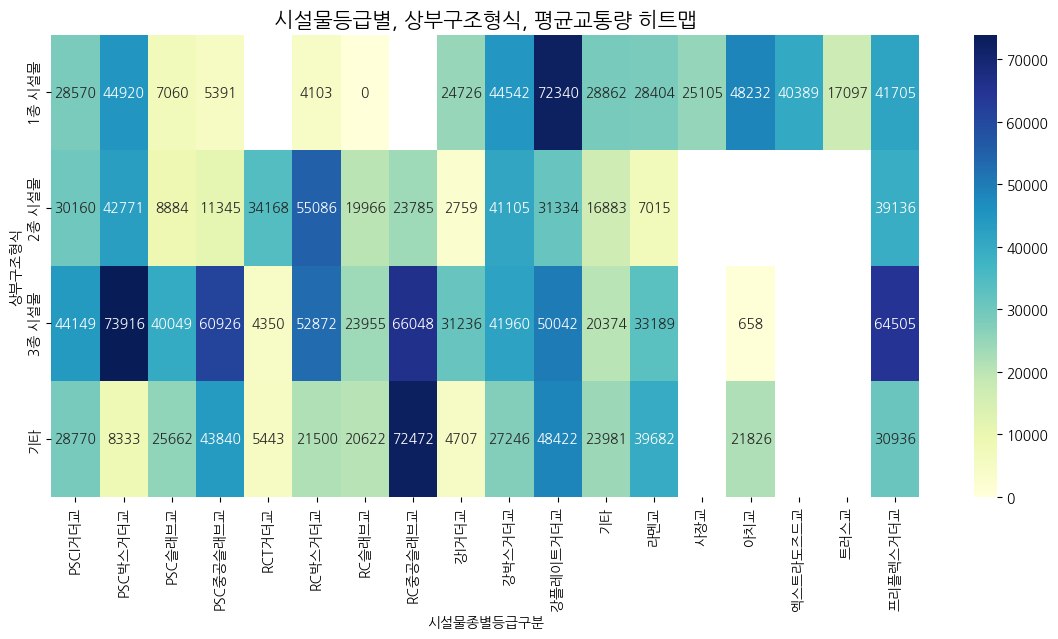

In [33]:
# 시설물등급별, 상부구조형식, 평균교통량 히트맵
pivot_table = df.pivot_table(index = 'New_facility', columns = '상부구조형식', values = '교통량')

plt.figure(figsize = (14, 6))
sns.heatmap(pivot_table, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('시설물등급별, 상부구조형식, 평균교통량 히트맵', fontsize = 15)
plt.xlabel('시설물종별등급구분')
plt.ylabel('상부구조형식')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_63100\2576086618.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


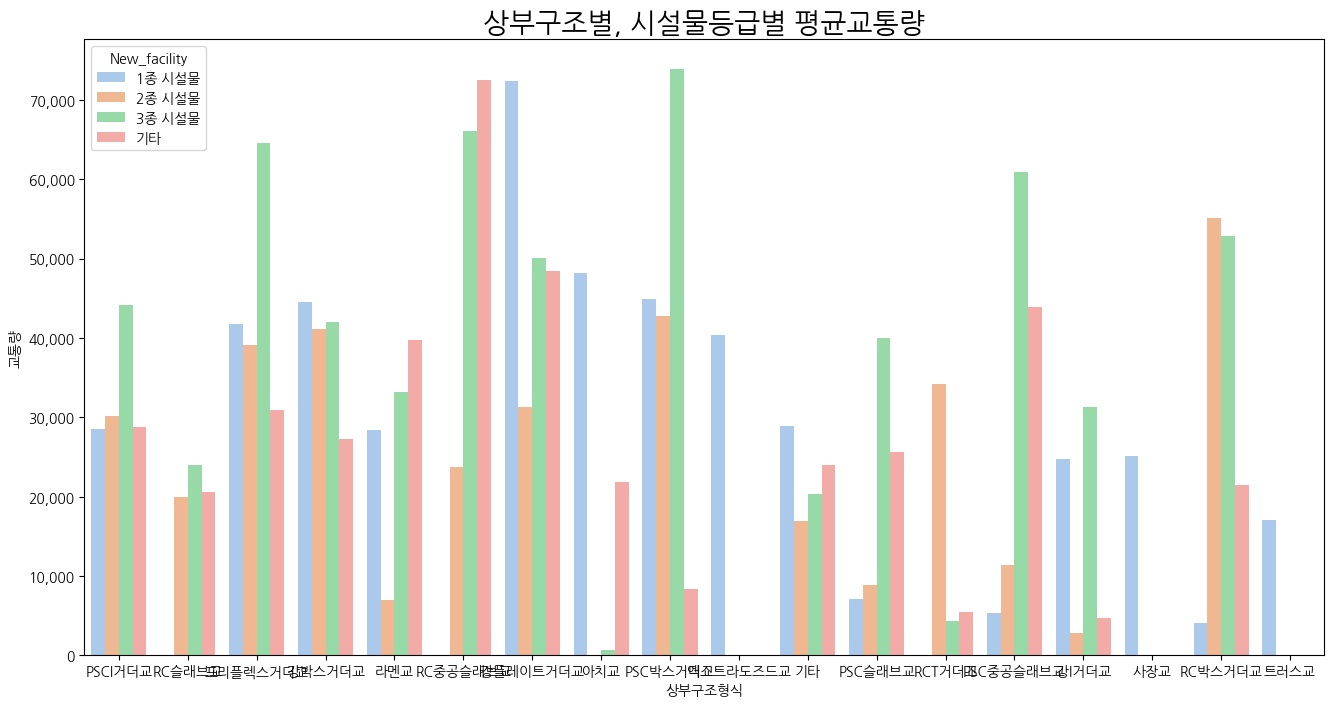

In [34]:
# 상부구조, 시설물등급별 평균교통량 확인

plt.figure(figsize = (16, 8))
# group_name = ['A', 'B', 'C', 'E']
sns.barplot(x = '상부구조형식', y = '교통량', hue = 'New_facility', palette = 'pastel', data = df,
            errorbar = None, hue_order = ['1종 시설물', '2종 시설물', '3종 시설물', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별, 시설물등급별 평균교통량', fontsize = 20)
plt.show()

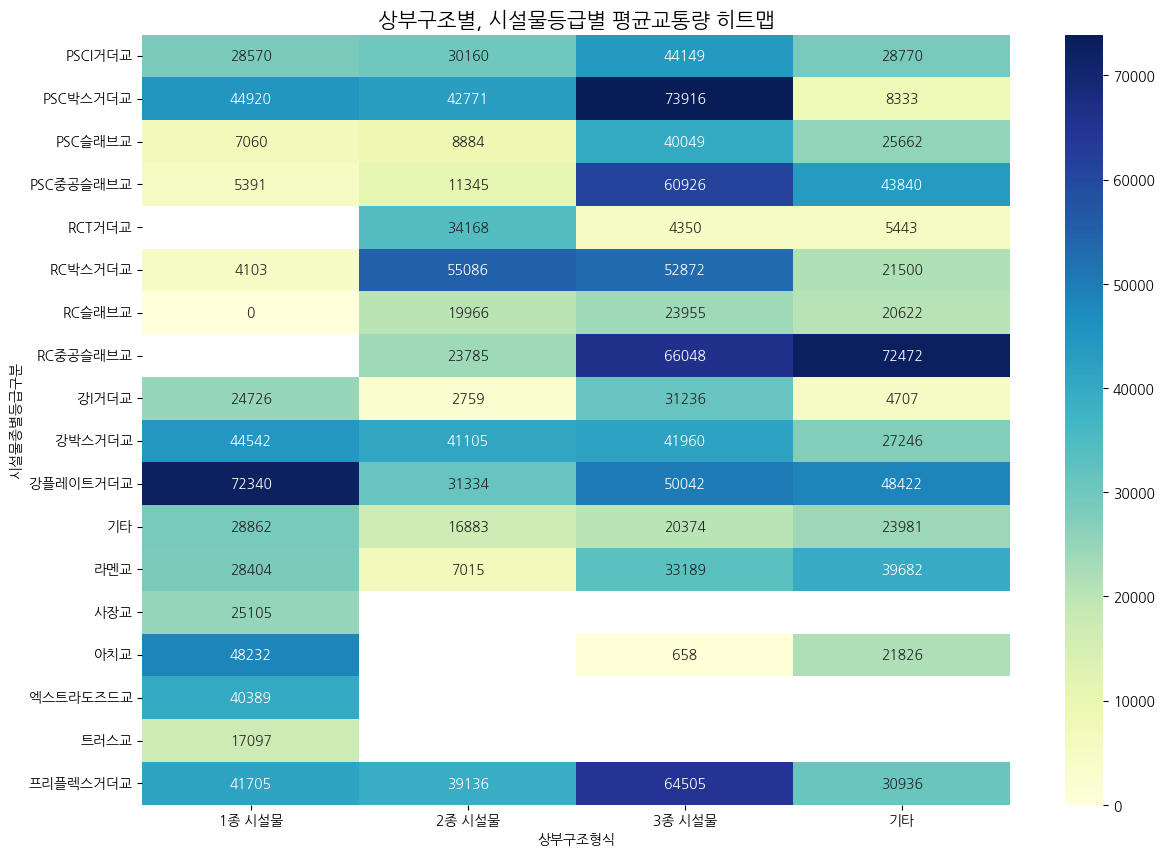

In [35]:
# 상부구조별, 시설물등급별 평균교통량 히트맵 
pivot_table = df.pivot_table(index = '상부구조형식', columns = 'New_facility', values = '교통량')

plt.figure(figsize=(14,10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('상부구조별, 시설물등급별 평균교통량 히트맵', fontsize = 15)
plt.xlabel('상부구조형식')
plt.ylabel('시설물종별등급구분')
plt.show()